In [1]:
#Import Libraries 
import pandas as pd 
import numpy as np 
import sklearn 
from sklearn import linear_model 
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from matplotlib import style
import pickle 
import tensorflow as tf


In [2]:
#laod Dataset 
dataset = pd.read_csv("student-mat.csv",sep=";")
dataset1 = pd.read_csv("student-por.csv",sep=";")

In [3]:
#veiw dataset
print(dataset.head())
print(dataset1.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     G

In [4]:
#Convert Binary to numeric 
def trans_address(x):
    if x =="U":
        return 1
    if x == "R":
        return 0

In [5]:
#append new numeric column on the dataset 
dataset["Trans_address"]=dataset["address"].apply(trans_address)
dataset

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Trans_address
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,1
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,1
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,4,4,5,4,11,9,9,9,1
391,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,3,4,2,3,14,16,16,1
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,3,3,3,3,3,10,8,7,0
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,1,3,4,5,0,11,12,10,0


In [6]:
#pick attributes 
dataset = dataset[["Trans_address","freetime","absences","G1","G2","G3"]]

In [7]:
#pick the label 
predict = "G3"

x = np.array(dataset.drop([predict],1)) #The features 
y = np.array(dataset[predict]) #label
x_train,x_test,y_train,y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.1 )

In [8]:
#split data into test and train data

#best = 0
#for _ in range(100):
    #x_train,x_test,y_train,y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.1 )
    #linear = linear_model.LinearRegression()
    # accuracy = linear.score(x_test,y_test)
    #print(accuracy)
    #if accuracy > best:
        #best = accuracy
        #with open("studentmodel.pickle","wb") as f:
            #pickle.dump(linear, f)
        
    

In [9]:
#linear model

#linear = linear_model.LinearRegression()


In [10]:
#fit model

#linear.fit(x_train,y_train)
#accuracy = linear.score(x_test,y_test)
#print(accuracy)

In [11]:
#create pickle file 
#with open("studentmodel.pickle","wb") as f:
   # pickle.dump(linear, f)

In [12]:

#read pickle file 
pickle_in = open("studentmodel.pickle", "rb")
linear = pickle.load(pickle_in)


In [13]:
#veiw the different weights that afferct the accuracy of the model 
print('Coefficient: \n', linear.coef_) # These are each slope value
print('Intercept: \n', linear.intercept_) # This is the intercept


Coefficient: 
 [-0.02627546  0.13263711  0.03988599  0.15292123  0.99757712]
Intercept: 
 -2.6038155157166507


In [14]:
#veiw predictions versus test data 
predictions = linear.predict(x_test) # Gets a list of all predictions

for x in range(len(predictions)):
    print(predictions[x], x_test[x], y_test[x])

12.789715715466205 [ 1  5 20 13 12] 12
9.126505336586705 [ 1  3  4  8 10] 10
12.997144367037262 [ 1  2 14 12 13] 12
10.376428404021825 [ 0  3  2 10 11] 12
13.82855483262409 [ 1  2  6 13 14] 14
5.974230034850914 [1 3 0 8 7] 0
13.95456922882899 [ 1  3  2 14 14] 14
12.93670798625294 [ 1  4  2 13 13] 11
3.6995087912804703 [0 3 0 6 5] 0
9.524671440960336 [ 1  4 28 10  9] 9
9.405440963529964 [ 1  4  0 10 10] 9
9.458623255489702 [ 0  3  4 10 10] 10
13.5090394683011 [ 1  2 23 13 13] 13
18.589143644700833 [ 1  5  0 17 18] 18
11.899511153233327 [ 1  3 12 11 12] 11
11.215092958433235 [ 1  2  2 10 12] 12
14.319899538717547 [ 1  4  4 15 14] 15
13.854513134785062 [ 1  4  0 13 14] 15
13.574722549018897 [ 1  3 54 11 12] 11
13.323270951330018 [ 1  1 14 15 13] 13
12.671433770408314 [ 1  2  2 13 13] 13
12.092318369585627 [ 1  3 13 12 12] 13
8.966961394130935 [ 1  3  0  8 10] 12
9.405440963529964 [ 1  4  0 10 10] 10
12.824355001146671 [ 1  2  2 14 13] 13
9.27942656732506 [ 1  3  4  9 10] 10
7.995659731797

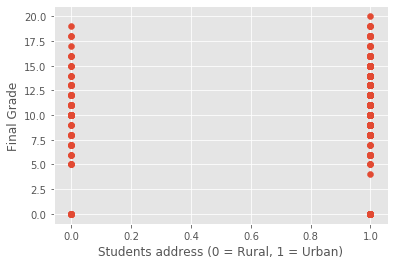

In [15]:
#corrolation between between the students address and their final grade G3
c = "Trans_address"
style.use("ggplot")
plt.scatter(dataset[c],dataset["G3"])
plt.xlabel("Students address (0 = Rural, 1 = Urban)")
plt.ylabel("Final Grade")
plt.show()


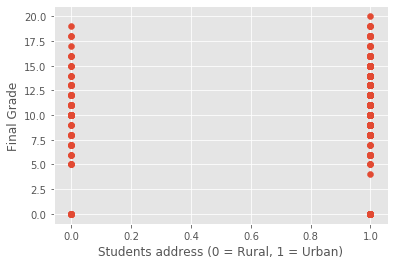

In [16]:
#corrolation between the amount of freetime the student has and their Final Grade 
c = "Trans_address"
style.use("ggplot")
plt.scatter(dataset[c],dataset["G3"])
plt.xlabel("Students address (0 = Rural, 1 = Urban)")
plt.ylabel("Final Grade")
plt.show()


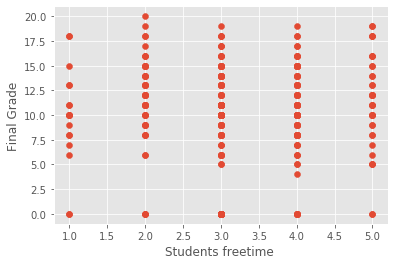

In [23]:
#corrolation between the amount of days the student was absent for and thier final grade 
c = "freetime"
style.use("ggplot")
plt.scatter(dataset[c],dataset["G3"])
plt.xlabel("Students freetime ")
plt.ylabel("Final Grade")
plt.show()


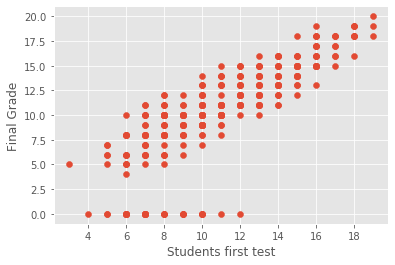

In [18]:
#corrolation between the students first test and their final grade 
c = "G1"
style.use("ggplot")
plt.scatter(dataset[c],dataset["G3"])
plt.xlabel("Students first test")
plt.ylabel("Final Grade")
plt.show()


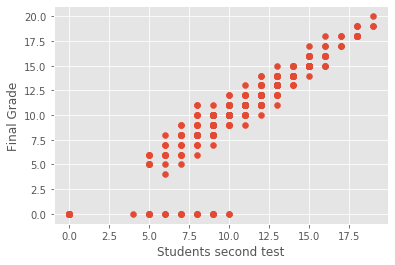

In [19]:
#corrolation between the students second test and their second grade
c = "G2"
style.use("ggplot")
plt.scatter(dataset[c],dataset["G3"])
plt.xlabel("Students second test")
plt.ylabel("Final Grade")
plt.show()
